In [1]:
#!/usr/bin/env python3

import pandas as pd
import errno    
import os
import numpy as np
import math

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from datetime import datetime

from sklearn.metrics import r2_score


'''
Author: Enrico Ceccolini
    TODO write the description
'''


datadir = "/datasets/eurora_data/db1/"
datadir = "/datasets/eurora_data/db/" #hdd

# settings
interval_comment = "Andrea"
suffix = "_5sec_"
start_time = pd.to_datetime('2014-03-31')
end_time = pd.to_datetime('2014-05-01')

## 3 settings Alina
interval_comment = "Alina"
start_time = pd.to_datetime('2014-03-31')
end_time = pd.to_datetime('2014-11-01')

infile_validate_approx = datadir + "CPUs/" + interval_comment + "/validate_approx_" + interval_comment + ".csv"

infile_large_jobs = datadir + "CPUs/" + interval_comment + "/jobs_real_pow_" + interval_comment + ".csv"


In [2]:
all_time_interval_power_consumption = pd.read_csv(infile_validate_approx, index_col=0)
all_time_interval_power_consumption.shape

/usr/local/lib/python3.5/dist-packages/numpy/lib/arraysetops.py:569: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


(3715201, 127)

In [37]:
def plot_hist(data, n_bins):
    plt.rcParams['figure.figsize'] = (6, 4)
    
    fig, ax = plt.subplots()
    n, bins, patches = plt.hist(data, n_bins, facecolor='blue', alpha=1)
    #plt.axis([-0.4, 0.2, 0, 49000])
    plt.xlabel("Normalized error", fontsize=12)
    plt.ylabel("Number of jobs", fontsize=12)
    
    ax.tick_params(axis='x', labelsize=15)
    ax.tick_params(axis='y', labelsize=15)
    
    plt.show()

In [21]:
def plot_line(data_dates, data_real, data_approx, days_interval):
    plt.rcParams['figure.figsize'] = (20, 5)

    X_AXIS_NAME = 'Time'
    Y_AXIS_NAME = 'Power (Watt)'
    # TITLE = 'Nodes power consumption - Andrea\'s data'

    fig, ax = plt.subplots()
    ax.xaxis.get_majorticklabels()
    ax.xaxis.set_major_locator(mdates.DayLocator(interval=days_interval))
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
    #ax.xaxis.set_major_locator(mdates.HourLocator(interval=days_interval))
    #ax.xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))
    ax.tick_params(axis='both', which='major', labelsize=15)
    
    dates = []
    colors = ("blue", "green")

    for ts in data_dates['timestamp']:
        local_d = datetime.strptime(ts, '%Y-%m-%d %H:%M:%S')
        dates.append(local_d)

    #print(len(dates))

    line1, = plt.plot(dates, data_real, c=colors[1], alpha=1, dashes=[3, 3], linewidth=1, label="Real Power")
    
    line2, = plt.plot(dates, data_approx, c=colors[0], alpha=0.9, linewidth=1, label="Estimated Mean Power")
    #plt.scatter(dates, node_data['pow_tot_0'] + node_data['pow_tot_1'])
    
    #plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc=3,
    #       ncol=2, mode="expand", borderaxespad=0.)
    # Create a legend for the first line.
    first_legend = plt.legend(handles=[line1, line2], loc=1)
    # Add the legend manually to the current Axes.
    ax = plt.gca().add_artist(first_legend)
    # Create another legend for the second line.
    #plt.legend(handles=[line2], loc=4)

    #fig.autofmt_xdate()
    plt.xlabel(X_AXIS_NAME, fontsize=15)
    plt.ylabel(Y_AXIS_NAME, fontsize=15)
    # plt.title(TITLE)
    


    # function to show the plot
    plt.show()
    #fig.savefig('graph.png', dpi=fig.dpi)

### Plot the whole interval

In [5]:
real = all_time_interval_power_consumption.select(lambda col: col.endswith("real"), axis=1)
approx = all_time_interval_power_consumption.select(lambda col: col.endswith("approx"), axis=1)

/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:1: FutureWarning: 'select' is deprecated and will be removed in a future release. You can use .loc[labels.map(crit)] as a replacement
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:2: FutureWarning: 'select' is deprecated and will be removed in a future release. You can use .loc[labels.map(crit)] as a replacement
  


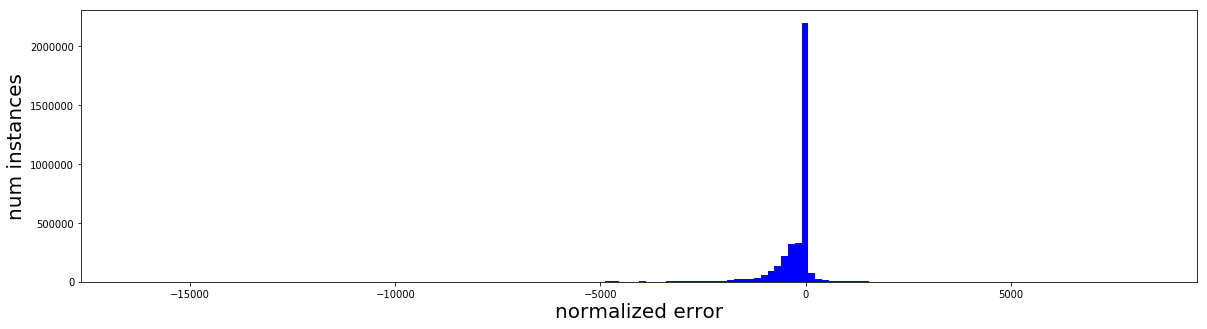

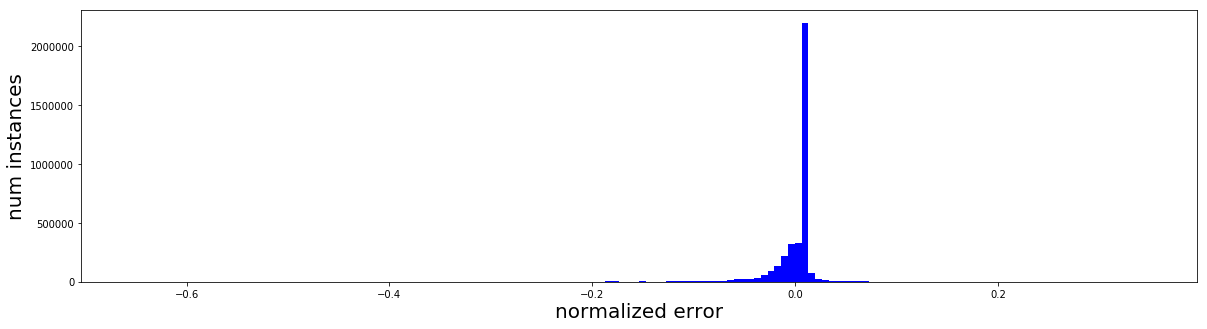

/usr/local/lib/python3.5/dist-packages/pandas/plotting/_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


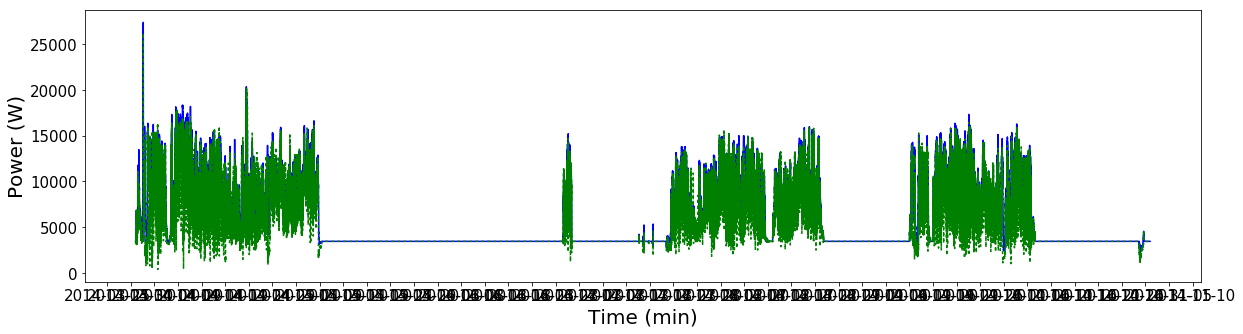

approximation accuracy: 0.9374910640338123


In [6]:
real['Total'] = real.iloc[:, -64:-1].sum(axis=1)
approx['Total'] = approx.iloc[:, -64:-1].sum(axis=1)
differences = real['Total'] - approx['Total']
df = pd.DataFrame(differences)
df = df.apply(lambda x: (x - np.mean(x)) / (np.max(x) - np.min(x)))
differences_norm = df['Total']

plot_hist(n_bins=150, data=differences)
plot_hist(n_bins=150, data=differences_norm)
plot_line(data_dates=all_time_interval_power_consumption, data_real=real['Total'], data_approx=approx['Total'], days_interval=25)

print("approximation accuracy: {}".format(r2_score(real['Total'], approx['Total'])))

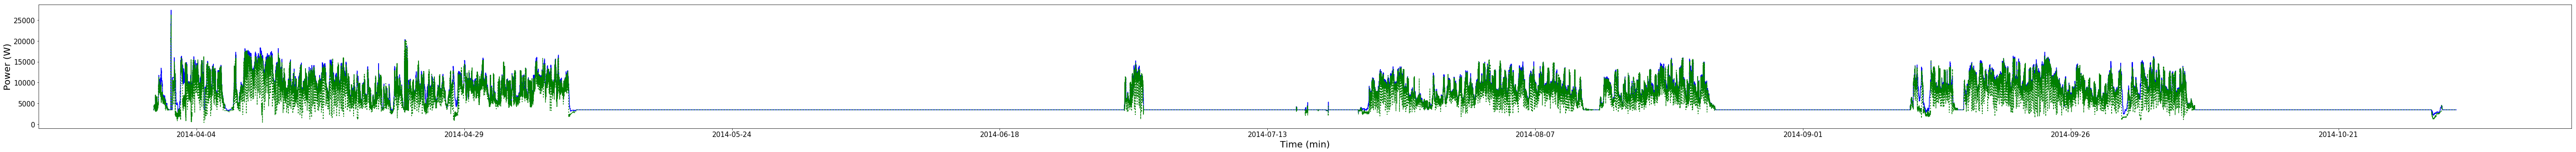

In [8]:
plot_line(data_dates=all_time_interval_power_consumption, data_real=real['Total'], data_approx=approx['Total'], days_interval=25)

In [9]:
#all_time_interval_power_consumption_correction = all_time_interval_power_consumption.fillna(55.52)
all_time_interval_power_consumption_correction = all_time_interval_power_consumption

### Plot an interval

/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:7: FutureWarning: 'select' is deprecated and will be removed in a future release. You can use .loc[labels.map(crit)] as a replacement
  import sys
/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:8: FutureWarning: 'select' is deprecated and will be removed in a future release. You can use .loc[labels.map(crit)] as a replacement
  


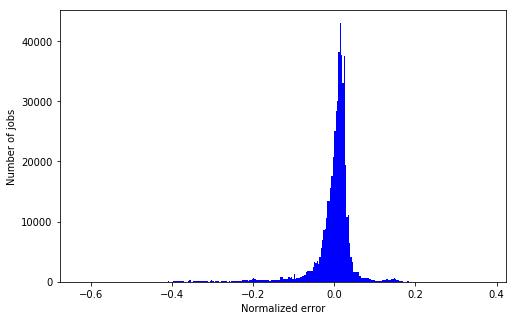

approximation accuracy: 0.8377770077981848


In [50]:
# Remove the head and the tail
interval_start_time = pd.to_datetime('2014-03-31 11:21:00')
interval_end_time = pd.to_datetime('2014-04-30 20:32:00')

interval_power_consumption = all_time_interval_power_consumption_correction[pd.to_datetime(all_time_interval_power_consumption_correction['timestamp']) >= interval_start_time]
interval_power_consumption = interval_power_consumption[pd.to_datetime(interval_power_consumption['timestamp']) <= interval_end_time]
real = interval_power_consumption.select(lambda col: col.endswith("real"), axis=1)
approx = interval_power_consumption.select(lambda col: col.endswith("approx"), axis=1)
real['Total']= real.iloc[:, -64:-1].sum(axis=1)
approx['Total']= approx.iloc[:, -64:-1].sum(axis=1)
differences = real['Total'] - approx['Total']
df = pd.DataFrame(differences)
df = df.apply(lambda x: (x - np.mean(x)) / (np.max(x) - np.min(x)))
differences_norm = df['Total']

#plot_hist(n_bins=150, data=differences)
plot_hist(n_bins=300, data=differences_norm)
#plot_line(data_dates=interval_power_consumption, data_real=real['Total'], data_approx=approx['Total'], days_interval=5)

print("approximation accuracy: {}".format(r2_score(real['Total'], approx['Total'])))

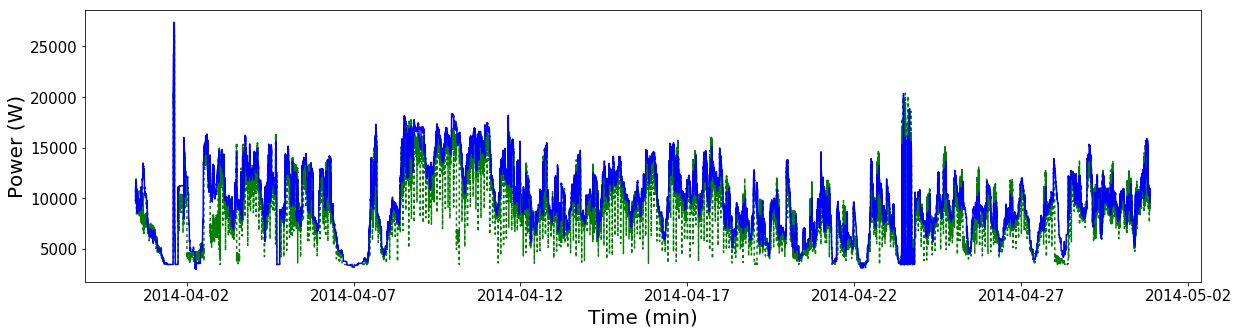

In [51]:
plot_line(data_dates=interval_power_consumption, data_real=real['Total'], data_approx=approx['Total'], days_interval=5)

### three days accuracy

/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:7: FutureWarning: 'select' is deprecated and will be removed in a future release. You can use .loc[labels.map(crit)] as a replacement
  import sys
/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:8: FutureWarning: 'select' is deprecated and will be removed in a future release. You can use .loc[labels.map(crit)] as a replacement
  


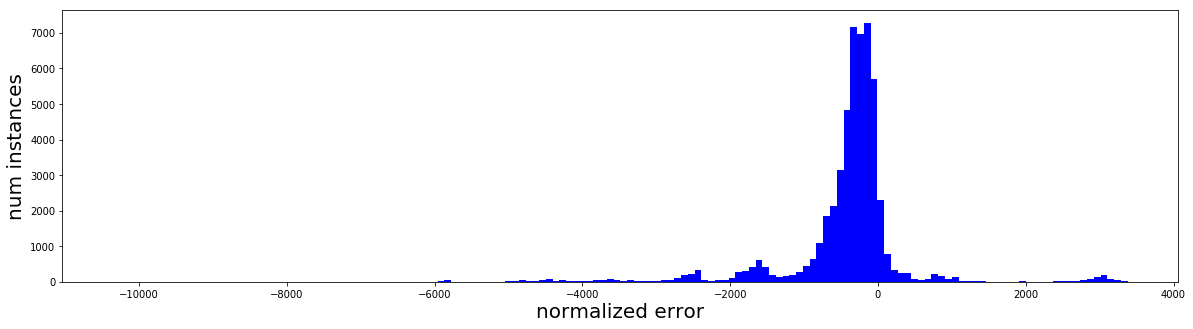

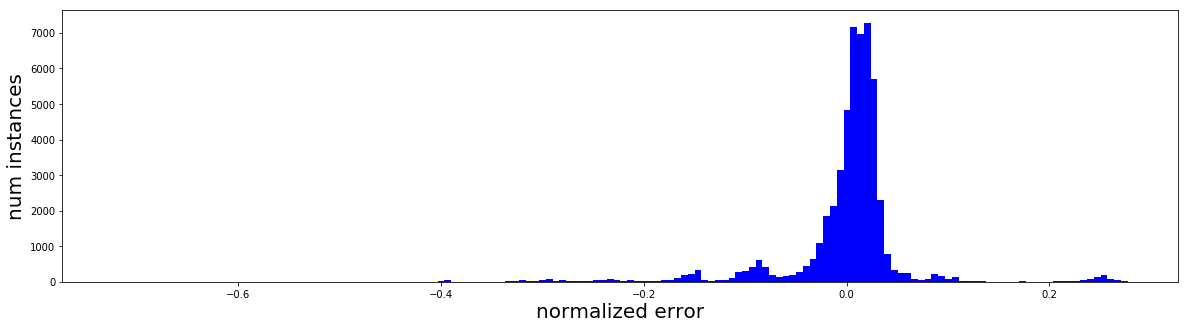

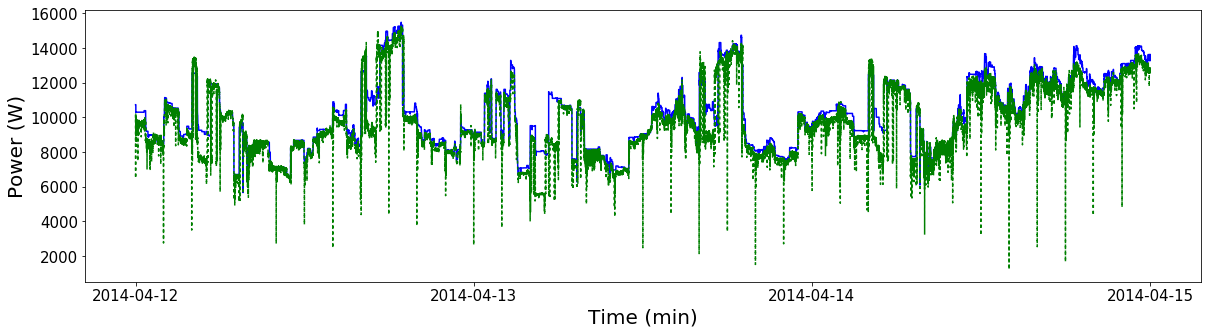

approximation accuracy: 0.7715785937942354


In [14]:
# Remove the head and the tail
interval_start_time = pd.to_datetime('2014-04-12')
interval_end_time = pd.to_datetime('2014-04-15')

interval_power_consumption = all_time_interval_power_consumption_correction[pd.to_datetime(all_time_interval_power_consumption_correction['timestamp']) >= interval_start_time]
interval_power_consumption = interval_power_consumption[pd.to_datetime(interval_power_consumption['timestamp']) <= interval_end_time]
real = interval_power_consumption.select(lambda col: col.endswith("real"), axis=1)
approx = interval_power_consumption.select(lambda col: col.endswith("approx"), axis=1)
real['Total']= real.iloc[:, -64:-1].sum(axis=1)
approx['Total']= approx.iloc[:, -64:-1].sum(axis=1)
differences = real['Total'] - approx['Total']
df = pd.DataFrame(differences)
df = df.apply(lambda x: (x - np.mean(x)) / (np.max(x) - np.min(x)))
differences_norm = df['Total']
plot_hist(n_bins=150, data=differences)
plot_hist(n_bins=150, data=differences_norm)
plot_line(data_dates=interval_power_consumption, data_real=real['Total'], data_approx=approx['Total'], days_interval=1)

print("approximation accuracy: {}".format(r2_score(real['Total'], approx['Total'])))

In [7]:
datadir = "/datasets/eurora_data/db1/"
datadir = "/datasets/eurora_data/db/"
infile_nodes = datadir + "nodes.csv"

nodes = pd.read_csv(infile_nodes, index_col=0)

In [8]:
all_time_interval_power_consumption_correction = all_time_interval_power_consumption

for node_index, node_row in nodes.iterrows():
    node_id = node_row['node_id']
    core_idle = node_row['core_idle']
    idle_consumption = core_idle * 16
    if( int(node_id) < 10):
        node_id = "0" + str(node_id)
    else:
        node_id = str(node_id)
    # print(node_id)
    if (node_id != "43"):
        all_time_interval_power_consumption_correction[node_id + "_real"].fillna(idle_consumption, inplace=True)

/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:7: FutureWarning: 'select' is deprecated and will be removed in a future release. You can use .loc[labels.map(crit)] as a replacement
  import sys
/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:8: FutureWarning: 'select' is deprecated and will be removed in a future release. You can use .loc[labels.map(crit)] as a replacement
  


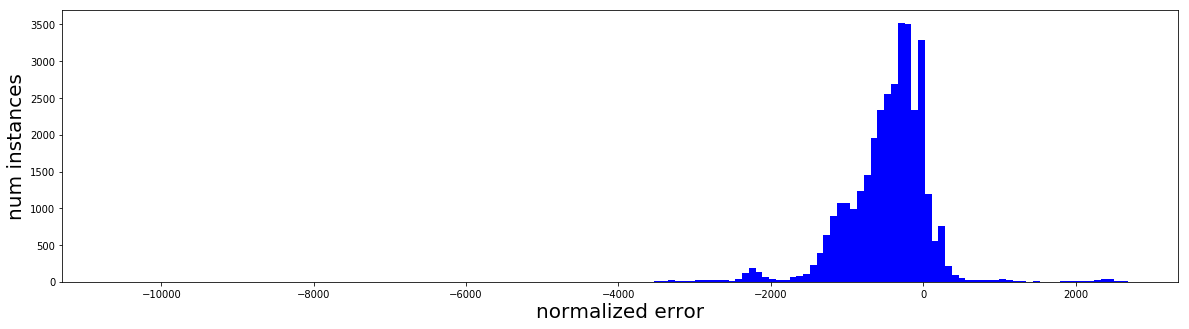

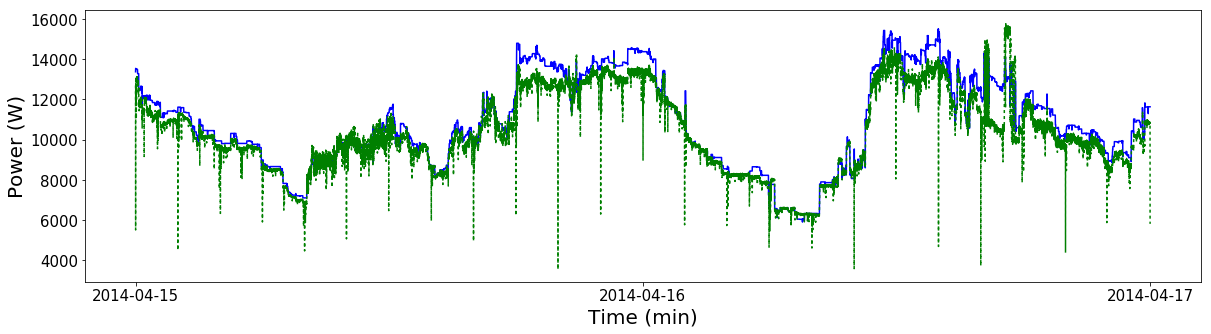

approximation accuracy: 0.8647761344966423


In [17]:
# Remove the head and the tail
interval_start_time = pd.to_datetime('2014-04-15')
interval_end_time = pd.to_datetime('2014-04-17')

interval_power_consumption = all_time_interval_power_consumption_correction[pd.to_datetime(all_time_interval_power_consumption_correction['timestamp']) >= interval_start_time]
interval_power_consumption = interval_power_consumption[pd.to_datetime(interval_power_consumption['timestamp']) <= interval_end_time]
real = interval_power_consumption.select(lambda col: col.endswith("real"), axis=1)
approx = interval_power_consumption.select(lambda col: col.endswith("approx"), axis=1)
real['Total']= real.iloc[:, -64:-1].sum(axis=1)
approx['Total']= approx.iloc[:, -64:-1].sum(axis=1)
differences = real['Total'] - approx['Total']
df = pd.DataFrame(differences)
df = df.apply(lambda x: (x - np.mean(x)) / (np.max(x) - np.min(x)))
differences_norm = df['Total']
plot_hist(n_bins=150, data=differences)
plot_line(data_dates=interval_power_consumption, data_real=real['Total'], data_approx=approx['Total'], days_interval=1)
print("approximation accuracy: {}".format(r2_score(real['Total'], approx['Total'])))

/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:7: FutureWarning: 'select' is deprecated and will be removed in a future release. You can use .loc[labels.map(crit)] as a replacement
  import sys
/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:8: FutureWarning: 'select' is deprecated and will be removed in a future release. You can use .loc[labels.map(crit)] as a replacement
  


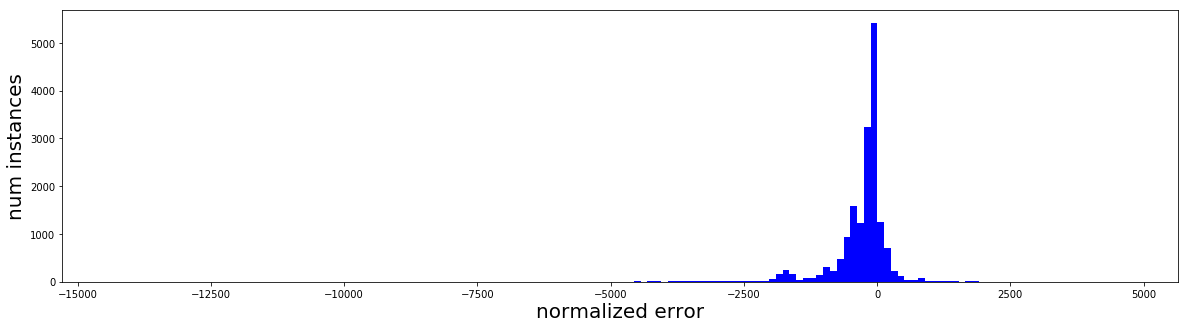

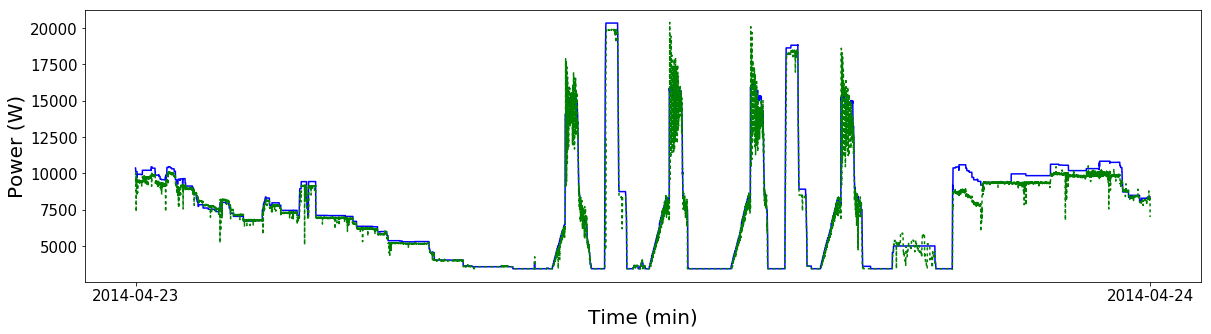

approximation accuracy: 0.953243415678361


In [18]:
# Remove the head and the tail
interval_start_time = pd.to_datetime('2014-04-23')
interval_end_time = pd.to_datetime('2014-04-24')

interval_power_consumption = all_time_interval_power_consumption_correction[pd.to_datetime(all_time_interval_power_consumption_correction['timestamp']) >= interval_start_time]
interval_power_consumption = interval_power_consumption[pd.to_datetime(interval_power_consumption['timestamp']) <= interval_end_time]
real = interval_power_consumption.select(lambda col: col.endswith("real"), axis=1)
approx = interval_power_consumption.select(lambda col: col.endswith("approx"), axis=1)
real['Total']= real.iloc[:, -64:-1].sum(axis=1)
approx['Total']= approx.iloc[:, -64:-1].sum(axis=1)
differences = real['Total'] - approx['Total']
df = pd.DataFrame(differences)
df = df.apply(lambda x: (x - np.mean(x)) / (np.max(x) - np.min(x)))
differences_norm = df['Total']
plot_hist(n_bins=150, data=differences)
plot_line(data_dates=interval_power_consumption, data_real=real['Total'], data_approx=approx['Total'], days_interval=1)
print("approximation accuracy: {}".format(r2_score(real['Total'], approx['Total'])))

In [104]:
def plot_line(data_dates, data_real, data_approx, days_interval):
    plt.rcParams['figure.figsize'] = (8, 5)

    X_AXIS_NAME = 'Time'
    Y_AXIS_NAME = 'Power (Watt)'
    # TITLE = 'Nodes power consumption - Andrea\'s data'

    fig, ax = plt.subplots()
    ax.xaxis.get_majorticklabels()
    #ax.xaxis.set_major_locator(mdates.DayLocator(interval=days_interval))
    ax.xaxis.set_major_locator(mdates.HourLocator(interval=days_interval))
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))
    ax.tick_params(axis='both', which='major', labelsize=10)

    dates = []
    colors = ("blue", "green")

    for ts in data_dates['timestamp']:
        local_d = datetime.strptime(ts, '%Y-%m-%d %H:%M:%S')
        dates.append(local_d)

    #print(len(dates))

    plt.plot(dates, data_real, c=colors[1], alpha=1, dashes=[3, 3], linewidth=0.8)
    
    plt.plot(dates, data_approx, c=colors[0], alpha=1, linewidth=0.9)
    #plt.scatter(dates, node_data['pow_tot_0'] + node_data['pow_tot_1'])

    #fig.autofmt_xdate()
    plt.xlabel(X_AXIS_NAME, fontsize=10)
    plt.ylabel(Y_AXIS_NAME, fontsize=10)
    # plt.title(TITLE)

    # function to show the plot
    plt.show()
    #fig.savefig('graph.png', dpi=fig.dpi)

/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:7: FutureWarning: 'select' is deprecated and will be removed in a future release. You can use .loc[labels.map(crit)] as a replacement
  import sys
/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:8: FutureWarning: 'select' is deprecated and will be removed in a future release. You can use .loc[labels.map(crit)] as a replacement
  


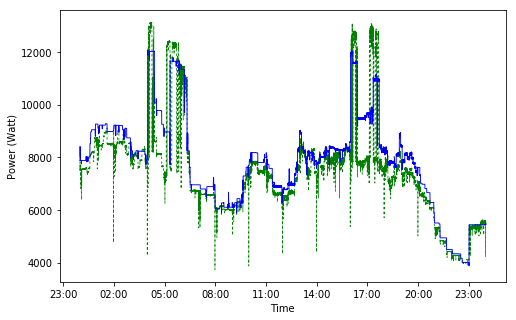

approximation accuracy: 0.753583572164598


In [105]:
# Remove the head and the tail
interval_start_time = pd.to_datetime('2014-08-10')
interval_end_time = pd.to_datetime('2014-08-11')

interval_power_consumption = all_time_interval_power_consumption_correction[pd.to_datetime(all_time_interval_power_consumption_correction['timestamp']) >= interval_start_time]
interval_power_consumption = interval_power_consumption[pd.to_datetime(interval_power_consumption['timestamp']) <= interval_end_time]
real = interval_power_consumption.select(lambda col: col.endswith("real"), axis=1)
approx = interval_power_consumption.select(lambda col: col.endswith("approx"), axis=1)
real['Total']= real.iloc[:, -64:-1].sum(axis=1)
approx['Total']= approx.iloc[:, -64:-1].sum(axis=1)
differences = real['Total'] - approx['Total']
df = pd.DataFrame(differences)
df = df.apply(lambda x: (x - np.mean(x)) / (np.max(x) - np.min(x)))
differences_norm = df['Total']
#plot_hist(n_bins=150, data=differences)
plot_line(data_dates=interval_power_consumption, data_real=real['Total'], data_approx=approx['Total'], days_interval=3)
print("approximation accuracy: {}".format(r2_score(real['Total'], approx['Total'])))

/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:7: FutureWarning: 'select' is deprecated and will be removed in a future release. You can use .loc[labels.map(crit)] as a replacement
  import sys
/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:8: FutureWarning: 'select' is deprecated and will be removed in a future release. You can use .loc[labels.map(crit)] as a replacement
  


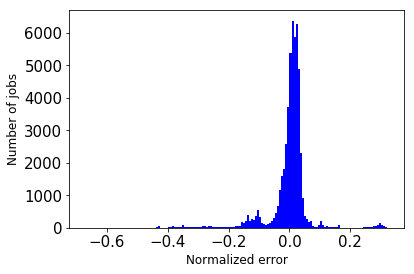

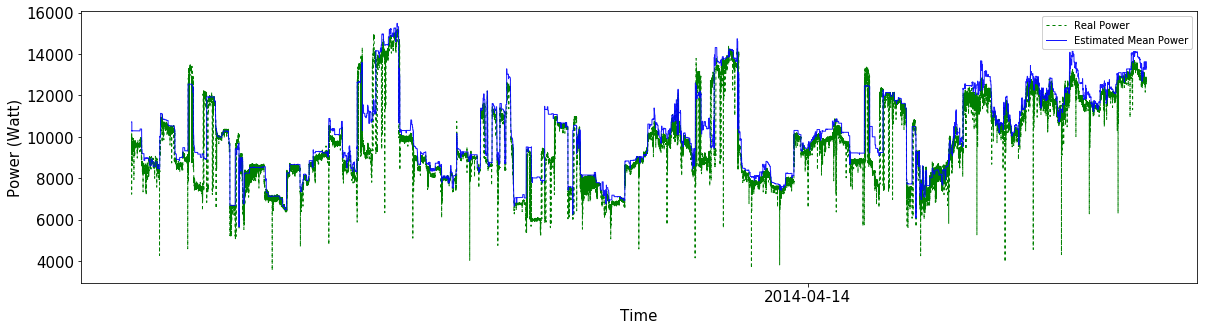

approximation accuracy: 0.787773840317514


In [39]:
# Remove the head and the tail
interval_start_time = pd.to_datetime('2014-04-12')
interval_end_time = pd.to_datetime('2014-04-15')

interval_power_consumption = all_time_interval_power_consumption_correction[pd.to_datetime(all_time_interval_power_consumption_correction['timestamp']) >= interval_start_time]
interval_power_consumption = interval_power_consumption[pd.to_datetime(interval_power_consumption['timestamp']) <= interval_end_time]
real = interval_power_consumption.select(lambda col: col.endswith("real"), axis=1)
approx = interval_power_consumption.select(lambda col: col.endswith("approx"), axis=1)
real['Total']= real.iloc[:, -64:-1].sum(axis=1)
approx['Total']= approx.iloc[:, -64:-1].sum(axis=1)
differences = real['Total'] - approx['Total']
df = pd.DataFrame(differences)
df = df.apply(lambda x: (x - np.mean(x)) / (np.max(x) - np.min(x)))
differences_norm = df['Total']
plot_hist(n_bins=150, data=differences_norm)
plot_line(data_dates=interval_power_consumption, data_real=real['Total'], data_approx=approx['Total'], days_interval=3)
print("approximation accuracy: {}".format(r2_score(real['Total'], approx['Total'])))

In [110]:
real[real['Total'] < 6000].shape

(302, 64)

### Validate predictions

In [20]:
all_time_interval_power_consumption.head(1)

,timestamp,01_real,01_approx,02_real,02_approx,03_real,03_approx,04_real,04_approx,05_real,...,60_real,60_approx,61_real,61_approx,62_real,62_approx,63_real,63_approx,64_real,64_approx
0,2014-03-31 00:00:00,51.829711,51.829711,52.545694,52.545694,55.334445,55.334445,54.319729,54.319729,54.601864,...,56.300235,56.300235,58.469255,58.469255,57.131946,57.131946,57.212285,57.212285,59.787256,59.787256


In [ ]:
real = all_time_interval_power_consumption.select(lambda col: col.endswith("real"), axis=1)
approx = all_time_interval_power_consumption.select(lambda col: col.endswith("approx"), axis=1)

In [ ]:
real['Total'] = real.iloc[:, -64:-1].sum(axis=1)
approx['Total'] = approx.iloc[:, -64:-1].sum(axis=1)
differences = real['Total'] - approx['Total']
df = pd.DataFrame(differences)
df = df.apply(lambda x: (x - np.mean(x)) / (np.max(x) - np.min(x)))
differences_norm = df['Total']

plot_hist(n_bins=150, data=differences)
plot_hist(n_bins=150, data=differences_norm)
plot_line(data_dates=all_time_interval_power_consumption, data_real=real['Total'], data_approx=approx['Total'], days_interval=5)

print("approximation accuracy: {}".format(r2_score(real['Total'], approx['Total'])))